In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

np.random.seed(30)

x_limits = [0,100]
y_limits = [0,50]

N = 50

In [22]:
def check_traingle(x, y):
    a = y <= x
    b = y <= -x + 100
    c = y >= 0   
    return a and b and c

def traingle(x_0,x_1,y_0,y_1,n):
    list_x = []
    list_y = []
    i = 0
    while i < n:
        x_i = np.random.uniform(x_0,x_1)
        y_i = np.random.uniform(y_0,y_1)
        if check_traingle(x_i,y_i):
            list_x.append(x_i)
            list_y.append(y_i)
            i += 1
    return np.vstack((list_x,list_y))

data = traingle(x_limits[0],x_limits[1],y_limits[0],y_limits[1],N)

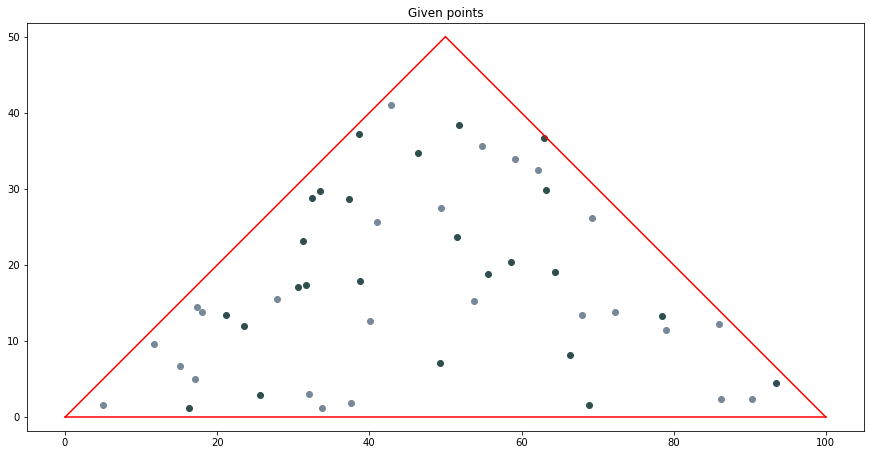

In [23]:
def set_of_points(data, x_limits, y_limits, showp, size=7, title = ""):
    figsize = np.array((abs(x_limits[0] - x_limits[1]), abs(y_limits[0] - y_limits[1])))
    figsize = figsize*(size/np.max(figsize))
    points, ax = plt.subplots(figsize = figsize)
    ax.set_title(title)
    ax.set_xlim(*x_limits)
    ax.set_ylim(*y_limits)
    ax.axis("equal")
    ax.scatter(data[0][:len(data[0])//2],data[1][:len(data[0])//2],c="DarkSlateGray")
    ax.scatter(data[0][len(data[0])//2:],data[1][len(data[0])//2:],c="LightSlateGray")
    if showp:
        ax.plot([0,50], [0,50],c="red")
        ax.plot([50,100], [50,0],c="red")
        ax.plot([100,0], [0,0],c="red")
    return points

sop = set_of_points(data, x_limits, y_limits,size = 15, title= "Given points", showp=True)

In [24]:
#Calculating distance between points
def distance(dot1, dot2):
    return np.sqrt(np.sum((dot1- dot2)**2))

#Finding the indexes of the most distant points
def max_distance(data):
    max_val = 0
    index = [0,0]
    for in1, dot1 in enumerate(data.T):
        for in2, dot2 in enumerate(data.T):
            if distance(dot1, dot2)> max_val:
                max_val = distance(dot1, dot2)
                index = [in1, in2]
    return sorted(index, key = lambda ind: data[0,ind])

index_max = max_distance(data)#indexes of the most distant points

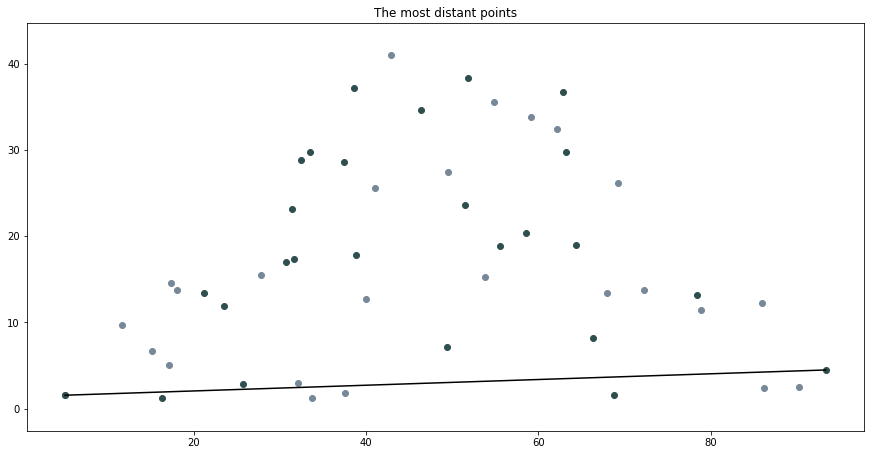

In [25]:

def distant_points(data, x_limits, y_limits, index_max,  size =7, title = ""):
    points= set_of_points(data, x_limits, y_limits,False, size, title)
    ax = points.axes[0]
    ax.scatter(data[0,index_max[0]],data[1,index_max[0]],c="DarkSlateGray")
    ax.plot([data[0,index_max[0]], data[0,index_max[1]]], [data[1,index_max[0]], data[1,index_max[1]]],c="Black")
    return points

dp = distant_points(data, x_limits, y_limits, index_max, size=15, title= "The most distant points")

In [26]:
#Rotation of points (stored as (2,N)) relative to center by angle is in radians and angle is in (-pi/2 , pi/2) 
def rotate_point (point, center, angle):
    ox = (point[0] - center[0])*np.cos(angle) - (point[1]- center[1])*np.sin(angle) + center[0]
    oy = (point[0] - center[0])*np.sin(angle) + (point[1]- center[1])*np.cos(angle) + center[1]
    return np.vstack((ox,oy))

#The function looks for the angle of rotation [-pi/2, pi/2] of the segment generated by the indixes
def find_angle(data, index_max):
    return np.arctan((data[1,index_max[1]] -data[1,index_max[0]])/ (data[0,index_max[1]] -data[0,index_max[0]]))

angle = find_angle(data, index_max)#Find the angle that forms the segment.

rdata = rotate_point(data, data[:,index_max[0]], -1*angle)#Turning to the found angle in the opposite direction.

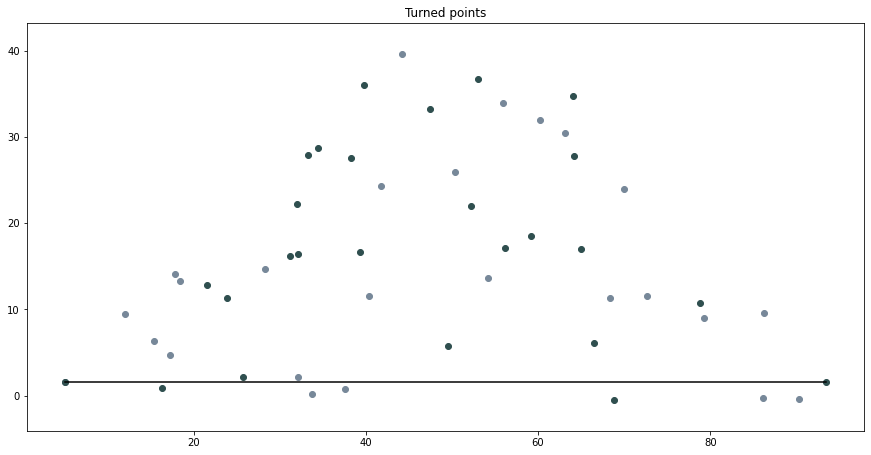

In [27]:
def rotate_point (point, center, angle):
    ox = (point[0] - center[0])*np.cos(angle) - (point[1]- center[1])*np.sin(angle) + center[0]
    oy = (point[0] - center[0])*np.sin(angle) + (point[1]- center[1])*np.cos(angle) + center[1]
    return np.vstack((ox,oy))

def find_angle(data, index_max):
    return np.arctan((data[1,index_max[1]] -data[1,index_max[0]])/ (data[0,index_max[1]] -data[0,index_max[0]]))

angle = find_angle(data, index_max)

rdata = rotate_point(data, data[:,index_max[0]], -1*angle)

#Painting turned points
def turned_points(rdata, x_limits, y_limits, index_max,  size =7, title = ""):    
    points= set_of_points(rdata, x_limits, y_limits, False, size , title)
    ax = points.axes[0]
    ax.scatter(rdata[0,index_max[0]],rdata[1,index_max[0]],c="DarkSlateGray")
    ax.plot([rdata[0,index_max[0]], rdata[0,index_max[1]]], [rdata[1,index_max[0]], rdata[1,index_max[1]]],c="Black")
    return points

TP = turned_points(rdata, x_limits, y_limits, index_max, size=15, title= "Turned points")

In [28]:
def vertical_segments(rdata):
    #Looking for points with a maximum and minimum value along the *y* axis. 
    #Drawing perpendiculars from these points to the segment.
    return [np.argmin(rdata,axis=1)[1], np.argmax(rdata,axis=1)[1]]

v_index = vertical_segments(rdata)

def vertical_perpendiculars(rdata, index_max, v_index):
    #Building perpendiculars 
    #return 2 segments, perpendicular to the maximum length, to the horizontal segment 
    seg1 = np.array([rdata.T[v_index[0]], [rdata.T[v_index[0],0], rdata.T[index_max[0],1]]]).T
    seg2 = np.array([rdata.T[v_index[1]], [rdata.T[v_index[1],0], rdata.T[index_max[0],1]]]).T
    return seg1, seg2

segments = np.array(vertical_perpendiculars(rdata, index_max, v_index))

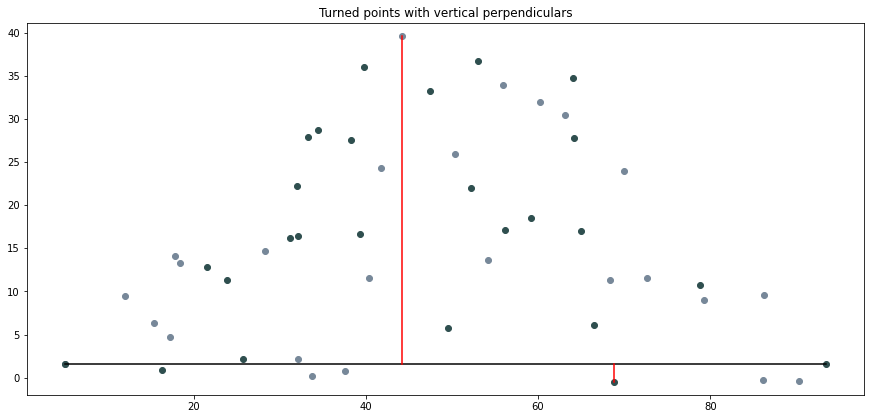

In [29]:
def points_with_perpendiculars(rdata, index_max,v_index, segments, size = 7, title= ""):
    #Rotated chart with maximum vertical directs 
    new_y_limits = rdata[1,v_index[0]]*1.1, rdata[1,v_index[1]]*1.1
    new_x_limits = rdata[0,index_max[0]]*1.1, rdata[0,index_max[1]]*1.1
    fig = distant_points(rdata, new_x_limits, new_y_limits,index_max, size, title )
    ax = fig.axes[0]
    ax.plot(segments[0][0], segments[0][1], color ='red')
    ax.plot(segments[1][0], segments[1][1], color ='red')
    return fig

PWP= points_with_perpendiculars(rdata,index_max,v_index, segments, size = 15,title=
          "Turned points with vertical perpendiculars")

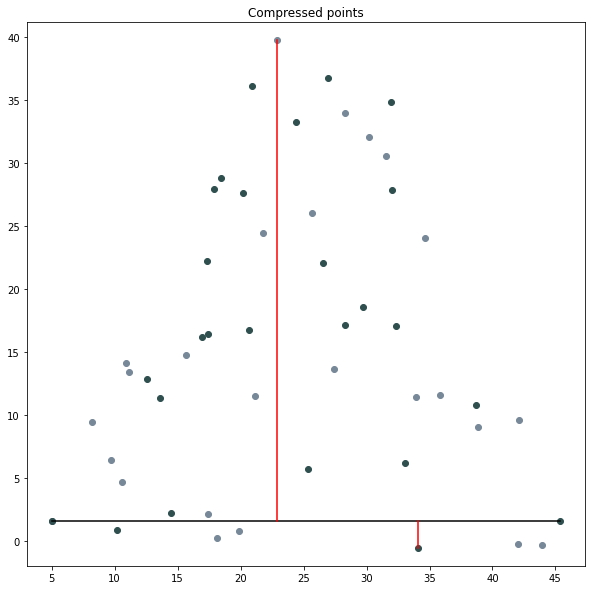

In [30]:
def compression_ratio(rdata, index_max, v_index):
    #finds the shrink/stretch factor in x to get a square,
    #equality of the segments that were obtained from index_max, v_index 
    x_length = np.abs(rdata[0,index_max[1]] - rdata[0,index_max[0]])
    y_length = np.abs(rdata[1,v_index[1]] - rdata[1,v_index[0]])
    return y_length/ x_length

koef = compression_ratio(rdata, index_max, v_index)

def make_square_data(rdata, index_max, segments, koef):
   #The function changes the data, compresses or stretches along the x coordinate to get a square,
    s_rdata = rdata.copy()
    s_rdata[0]= s_rdata[0,index_max[0]] +  (s_rdata[0] - s_rdata[0,index_max[0]])* koef
    s_segments= segments.copy()
    for i in range(len(s_segments)):
        s_segments[i][0]= s_rdata[0,index_max[0]] +  (s_segments[i][0] - s_rdata[0,index_max[0]])* koef
    return s_rdata, s_segments

s_rdata, s_segments = make_square_data(rdata, index_max, segments, koef)

CPWP = points_with_perpendiculars(s_rdata,index_max,v_index, s_segments, size =10, title="Compressed points")

In [31]:
class MyCircle:
    def __init__(self, xy, radius, data):
        self.xy = xy
        self.radius = radius
        self.count = self._count_of_inside_dots(data)
    def _count_of_inside_dots(self,data):
        #a circle class that stores the number of points that are inside (including the border) 
        count =0
        for dot in data.T:
            if distance(dot, self.xy) <= self.radius:
                count+=1
        return count

    def __str__(self):
        return f"MyCircle xy: {self.xy}, radius: {self.radius},count: {self.count}"

In [32]:
def find_center(data,index_max, v_index):
    #Calculating the center of concentric circles. Center is the average of index_max (x-axis) and v_index (y-axis) 
    return np.array([(data[0,index_max[0]]+data[0,index_max[1]])/2, (data[1,v_index[0]]+data[1,v_index[1]])/2 ])

mycircle_list = []
new_center = find_center(s_rdata, index_max, v_index)
for dot in s_rdata.T:
    mycircle_list.append(MyCircle(new_center, distance(dot, new_center), s_rdata))
print(*mycircle_list[:5], sep='\n') # <--some of the circles

MyCircle xy: [25.18669034 19.58425076], radius: 7.598506226275221,count: 8
MyCircle xy: [25.18669034 19.58425076], radius: 15.569111192316218,count: 30
MyCircle xy: [25.18669034 19.58425076], radius: 4.640490698938801,count: 3
MyCircle xy: [25.18669034 19.58425076], radius: 17.27264943826035,count: 34
MyCircle xy: [25.18669034 19.58425076], radius: 27.034775913408748,count: 48


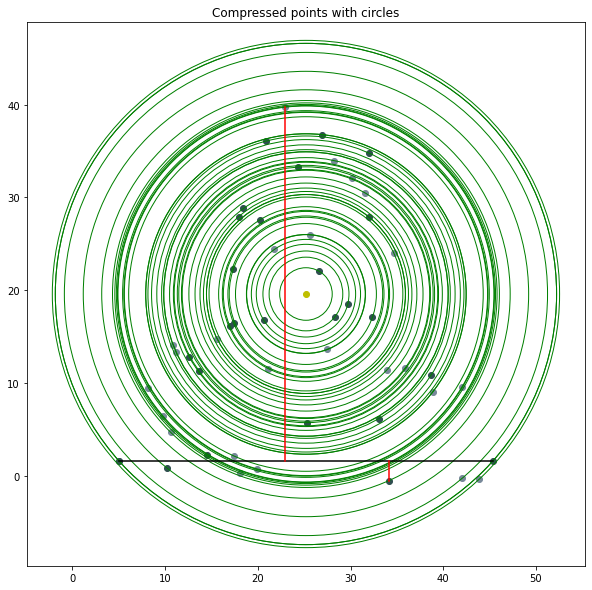

In [33]:
#painting the circles with perpendiculars and center
def points_with_circles(s_rdata, index_max,v_index, segments, centr, mycircle_list,size = 7, title= ""):

    fig = points_with_perpendiculars(s_rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for circle in mycircle_list:
        ax.add_patch(ptc.Circle(circle.xy,circle.radius, fill= False, color ="green"))
    return fig

PWC= points_with_circles(s_rdata,index_max,v_index, s_segments, new_center, mycircle_list, size = 10,
              title="Compressed points with circles")

## Створення еліпса Петуніна

Тепер повернемо дані до виду з попередніх кроків (повернемо операцію стиснення). Отримаємо просто повернутий набір даних. Також розтягнемо концентричні кола (отримаємо еліпси):

    - буде перенесено центр
    - головною віссю отриманого еліпса буде діаметр кола, помножений на коеф. розтягнення
    - кут отриманого еліпса дорівнює нулю (кут між віссю *x* та головною віссю еліпса).
    - кількість точок, що було всередині кола, буде дорівнює кількості точок, що потрапили всередину еліпса.

При ініціалізації еліпса підраховується теоретична оцінка ймовірності влучення точки всередину еліпса за формулою
$$
    P = \frac{count}{N+1}
$$
де $𝑐𝑜𝑢𝑛𝑡$ - кількість точок, що потрапили всередину еліпса, $𝑁$ - загальна кількість точок. 


In [34]:
class MyEllipse:
    """
    Класс эллипсов с кол-вом точек, что попали внутрь (включая границу)
    """
    def __init__(self, xy, width, height, N, angle=0, count=0):
        self.xy = xy
        self._width = width 
        self._height = height
        self.angle = angle
        self.count = count
        self.area = self._area_calculation()
        self.prob = self.count / (N+1)# probability - that points are inside the ellipse

    def _area_calculation(self):
        return np.pi *self._width*self._height/4

    # Decorator for width and height
    # While changing width and height the are will be changed

    @property
    def width(self):
        return self._width
    @width.setter
    def width(self, value):
        if value <= 0:
            raise ValueError('Cannot be <=0')
        self._width = value
        self.area= self._area_calculation()
    
    @property
    def height(self):
        return self._height
    
    @height.setter
    def height(self, value):
        if value <= 0:
            raise ValueError('Cannot be <=0')
        self._height = value
        self.area= self._area_calculation()



    def __str__(self):
        return f"MyEllipse xy: {self.xy}, width: {self._width}, height: {self._height}, angle: {self.angle}, count: {self.count}, area: {self.area}, prob: {self.prob}"
    def __repr__(self):
        return f"#MyEllipse c:({self.xy[0]},{self.xy[0]}), (w/h/a:{self._width},{self._height},{self.angle}), count: {self.count}, area: {self.area}, prob: {self.prob} #"

In [35]:
myellipse_list = [] #creating list of ellipses
inv_koef = 1/koef
r_center = s_rdata.T[index_max[0]] + (new_center - s_rdata.T[index_max[0]])*np.array([inv_koef,1])
for circle in mycircle_list:
    myellipse_list.append(MyEllipse(r_center, 2*circle.radius*inv_koef, 2*circle.radius, N,
                                    angle=0, count=circle.count))
print(*myellipse_list[:5], sep="\n") #<--some of petunins rotated ellipses

MyEllipse xy: [49.23836302 19.58425076], width: 33.34239337803465, height: 15.197012452550442, angle: 0, count: 8, area: 397.96499367228176, prob: 0.1568627450980392
MyEllipse xy: [49.23836302 19.58425076], width: 68.31756327651746, height: 31.138222384632435, angle: 0, count: 30, area: 1670.7676783027348, prob: 0.5882352941176471
MyEllipse xy: [49.23836302 19.58425076], width: 20.362563607054447, height: 9.280981397877602, angle: 0, count: 3, area: 148.42813736945396, prob: 0.058823529411764705
MyEllipse xy: [49.23836302 19.58425076], width: 75.79272229321799, height: 34.5452988765207, angle: 0, count: 34, area: 2056.3940659170767, prob: 0.6666666666666666
MyEllipse xy: [49.23836302 19.58425076], width: 118.6291234815185, height: 54.069551826817495, angle: 0, count: 48, area: 5037.71938813609, prob: 0.9411764705882353


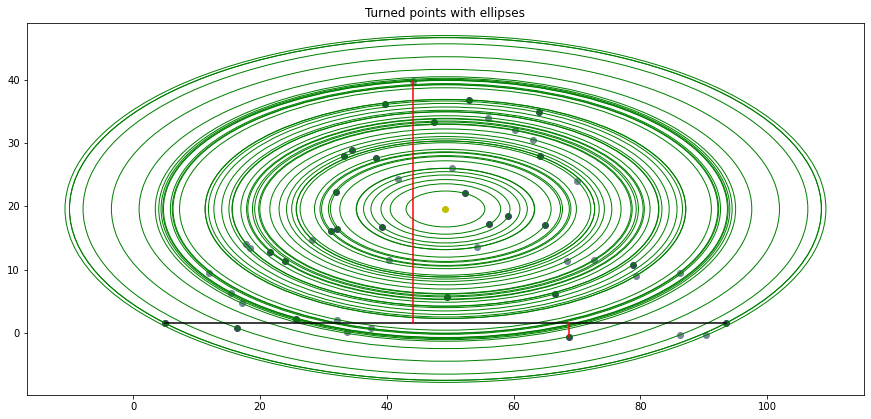

In [36]:
#painting Petunins rotated Ellipses with perpendiculars and direct (2 distant points)

def turned_points_with_ellipses(rdata, index_max, v_index, segments, center, myellipse_list, size =7, title =""):

    fig = points_with_perpendiculars(rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(center[0], center[1], color = "y")
    for ell in myellipse_list:
        ax.add_patch(ptc.Ellipse(ell.xy, ell.width, ell.height, angle = ell.angle, fill= False, color ="green"))
    return fig
TPWE= turned_points_with_ellipses(rdata, index_max, v_index, segments, r_center, myellipse_list, size =15, 
          title = "Turned points with ellipses")

In [37]:
#changing rotaion level of Petunins ellipses
center = rotate_point(r_center,data[:,index_max[0]], angle)
for ell in myellipse_list:
    ell.angle = np.degrees(angle)
    ell.xy = center


print(*myellipse_list[:5], sep="\n") #<--some of petunins ellipses

MyEllipse xy: [[48.61597617]
 [21.04024581]], width: 33.34239337803465, height: 15.197012452550442, angle: 1.9007961989351585, count: 8, area: 397.96499367228176, prob: 0.1568627450980392
MyEllipse xy: [[48.61597617]
 [21.04024581]], width: 68.31756327651746, height: 31.138222384632435, angle: 1.9007961989351585, count: 30, area: 1670.7676783027348, prob: 0.5882352941176471
MyEllipse xy: [[48.61597617]
 [21.04024581]], width: 20.362563607054447, height: 9.280981397877602, angle: 1.9007961989351585, count: 3, area: 148.42813736945396, prob: 0.058823529411764705
MyEllipse xy: [[48.61597617]
 [21.04024581]], width: 75.79272229321799, height: 34.5452988765207, angle: 1.9007961989351585, count: 34, area: 2056.3940659170767, prob: 0.6666666666666666
MyEllipse xy: [[48.61597617]
 [21.04024581]], width: 118.6291234815185, height: 54.069551826817495, angle: 1.9007961989351585, count: 48, area: 5037.71938813609, prob: 0.9411764705882353


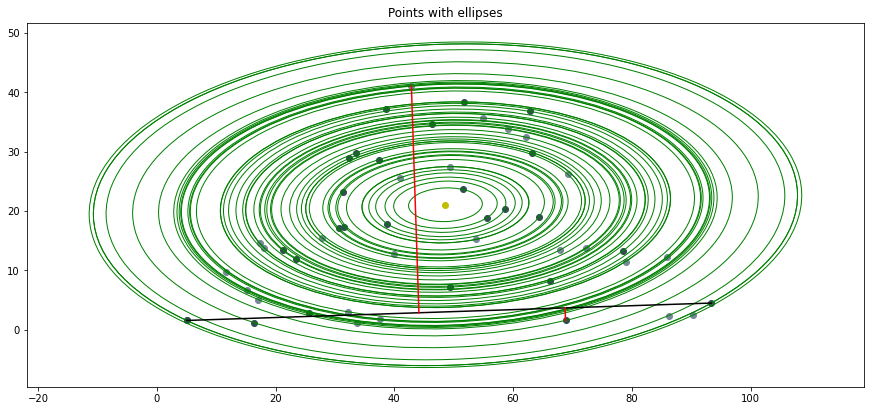

In [38]:
#painting Petunins Ellipses with perpendiculars and direct (2 distant points)

segments_r = []
for seg in segments:
    segments_r.append(rotate_point(seg,data[:,index_max[0]], angle))
PWE= turned_points_with_ellipses(data, index_max, v_index, segments_r, center, myellipse_list, size = 15,
          title = "Points with ellipses")

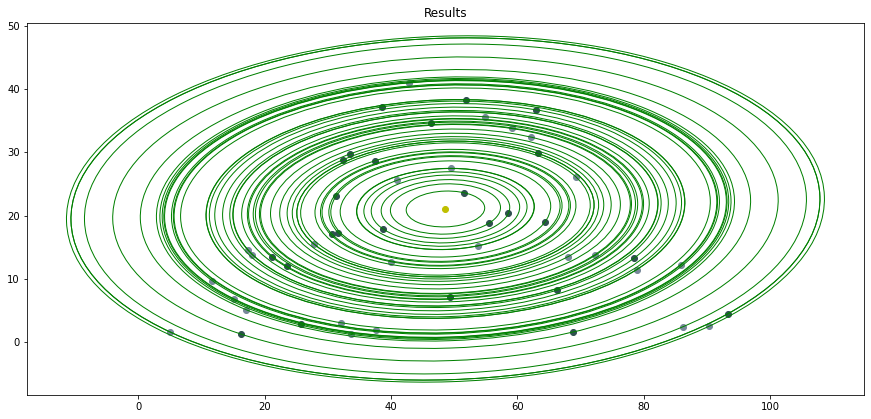

In [39]:
def points_and_ellipses_final(data, myellipse_list, center, size =7 ,title = ""):
    new_y_limits = rdata[1,v_index[0]]*1.1, rdata[1,v_index[1]]*1.1
    new_x_limits = rdata[0,index_max[0]]*1.1, rdata[0,index_max[1]]*1.1
    fig= set_of_points(data, new_x_limits, new_y_limits,False, size , title)
    ax = fig.axes[0]
    ax.scatter(center[0], center[1], color = "y")
    for ell in myellipse_list:
        ax.add_patch(ptc.Ellipse(ell.xy, ell.width, ell.height, angle = ell.angle, fill= False, color ="green"))
    return fig

PAEF = points_and_ellipses_final(data, myellipse_list, center, size =15 ,title = "Results")

In [40]:
from tabulate import tabulate

# def print_table(myellipse_list, mycircle_list):
#
#     # printing table of the results
#     print("|"+"|".join(["Point","Circle radius", "Number of points inside", "Ellipse area", "Proportions"]))
#
#     for i in range(len(mycircle_list)):
#         print("|"+"|".join([str(i+1),str(mycircle_list[i].radius),str(myellipse_list[i].count),
#                             str(myellipse_list[i].area),str(myellipse_list[i].prob)]))


def print_results(ellipses, vertices):
    tabulation_data = []

    for i in range(len(vertices)):
        tabulation_data.append([i+1, vertices[i].radius, ellipses[i].count, ellipses[i].area, ellipses[i].prob])

    print(tabulate(tabulation_data, headers=["Vertex", "Vertex radius", "Vertices inside", "Ellipse area", "Probability"]))


print_results(myellipse_list, mycircle_list)

  Vertex    Vertex radius    Vertices inside    Ellipse area    Probability
--------  ---------------  -----------------  --------------  -------------
       1          7.59851                  8        397.965       0.156863
       2         15.5691                  30       1670.77        0.588235
       3          4.64049                  3        148.428       0.0588235
       4         17.2726                  34       2056.39        0.666667
       5         27.0348                  48       5037.72        0.941176
       6         14.2125                  25       1392.28        0.490196
       7         16.6534                  32       1911.59        0.627451
       8         22.0285                  45       3344.71        0.882353
       9          3.97406                  2        108.857       0.0392157
      10          2.83365                  1         55.3452      0.0196078
      11         17.0437                  33       2002.25        0.647059
      12         11.